<a href="https://colab.research.google.com/github/kaapivalli/Machine-Learning/blob/main/TITANIC_SURVIVORS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>PREDICTING THE GROUND TRUTH OF THE SURVIVORS OF TITANIC WREAKAGE</u></b>
- THE GROUND TRUTH CONSISTS OF TWO CLASSES - 0 AND 1 DENOTING IF THE PASSENGER SURVIVED OR DIED
- IT IS A <b>CLASSIFICATION PROBLEM</b>
- Source:https://www.kaggle.com/competitions/titanic/data
- <img src="https://static.timesofisrael.com/atlantajewishtimes/uploads/2022/03/DT6RD9.jpg" alt="Titanic_ship_sinking_image"/>

### **DATA DICTIONARY:**<br>
<table>
<tr>
<th>Variable</th><th>	Definition</th><th>	Key</th>
</tr><tr>
<td>survival</td><td>	Survival</td><td>	0 = No, 1 = Yes</td></tr>
<tr>
<td>pclass</td><td>	Ticket class</td><td>	1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr>
<td>sex</td><td>	Sex</td></tr>
<tr>	
<td>Age</td><td>	Age</td><td> in years</td></tr>
<tr>	
<td>sibsp</td><td>	# of siblings / spouses aboard the Titanic</td></tr>
<tr>	
<td>parch</td><td>	# of parents / children aboard the Titanic</td></tr>
<tr>	
<td>ticket</td><td>	Ticket number</td></tr>
<tr>	
<td>fare</td><td>	Passenger fare</td></tr>
<tr>	
<td>cabin</td><td>	Cabin number</td></tr>	
<tr>
<td>embarked</td><td>	Port of Embarkation</td><td>	C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>
</table>

<b><h3>VARIABLES DETAILS</h3></b>

- **pclass**: A proxy for socio-economic status (SES)
   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower

- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- **sibsp**: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch** : The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
tr=pd.read_csv('train_titanic.csv')
tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tes=pd.read_csv('test_titanic.csv')
tes

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
tr.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
tes.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
print(tr.info(),"\n ***********************************************************************")
print(tes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 
 ***********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       

In [7]:
tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
tes.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


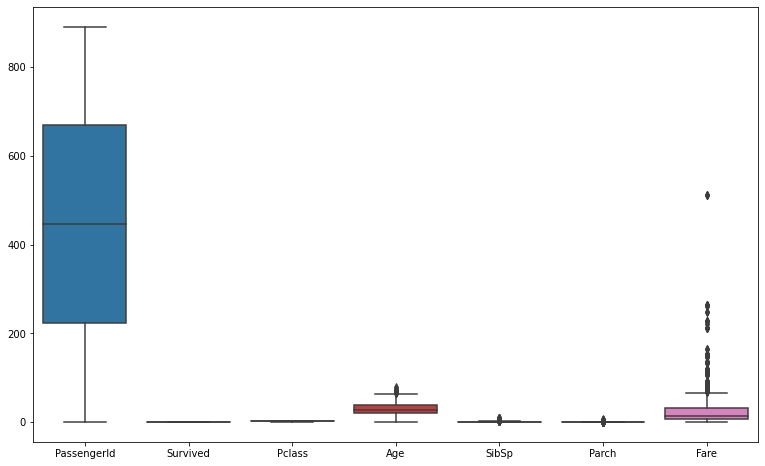

In [9]:
plt.figure(figsize=(13,8))
sns.boxplot(data=tr)

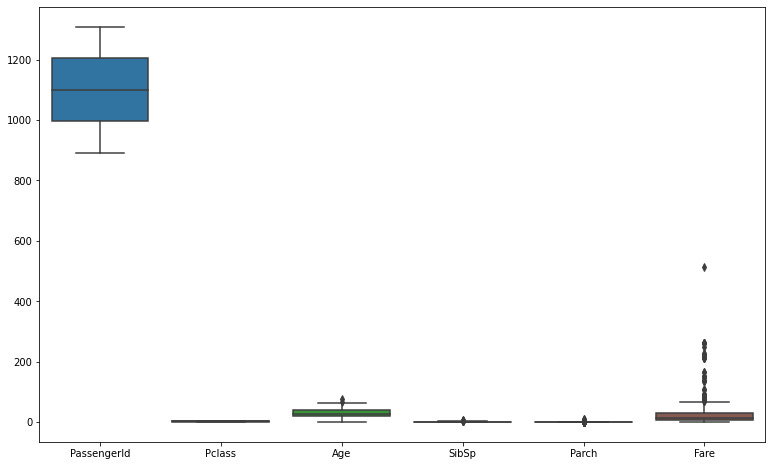

In [10]:
plt.figure(figsize=(13,8))
sns.boxplot(data=tes)

In [11]:
def b_plott(col):
    fig=plt.figure(figsize=(13,8))
    fig.add_subplot(1,2,1)
    plt.title("{} of Train data".format(col))
    sns.boxplot(data=tr,x=col)
    fig.add_subplot(1,2,2)
    plt.title("{} of Test data".format(col))
    sns.boxplot(data=tes,x=col)
    plt.show()

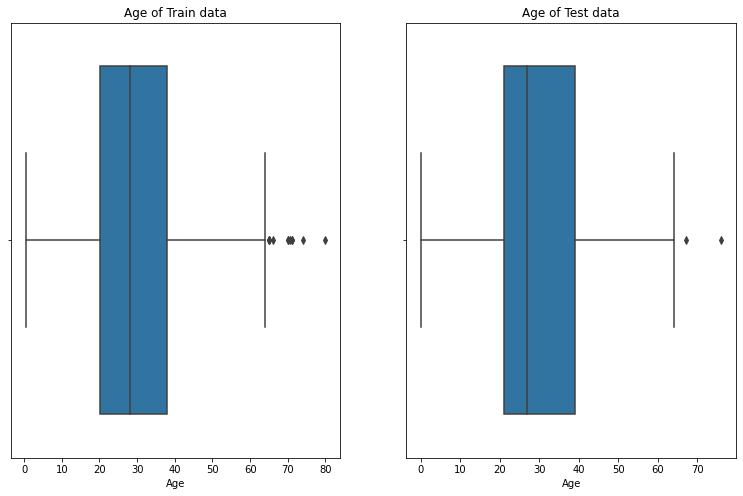

In [12]:
b_plott('Age')

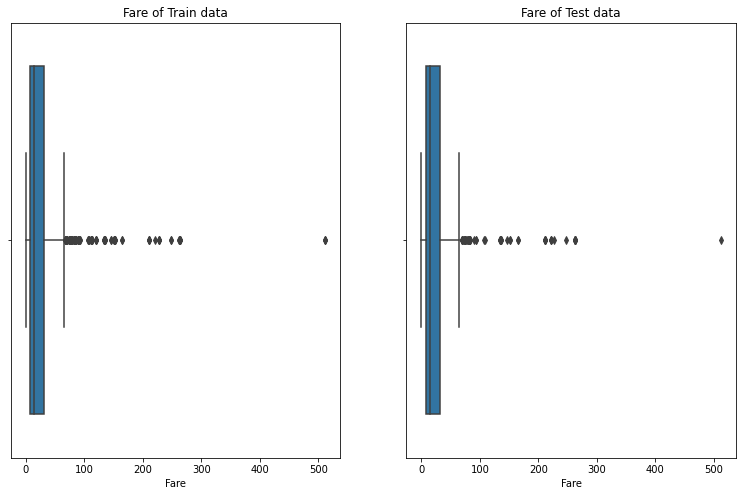

In [13]:
b_plott('Fare')

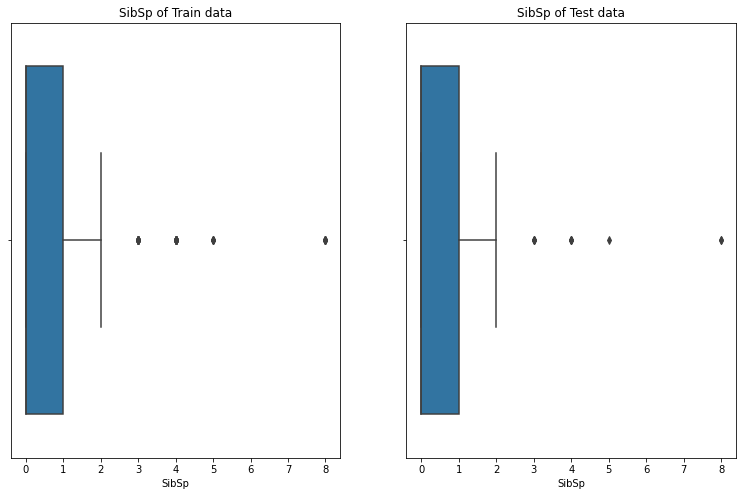

In [14]:
b_plott('SibSp')

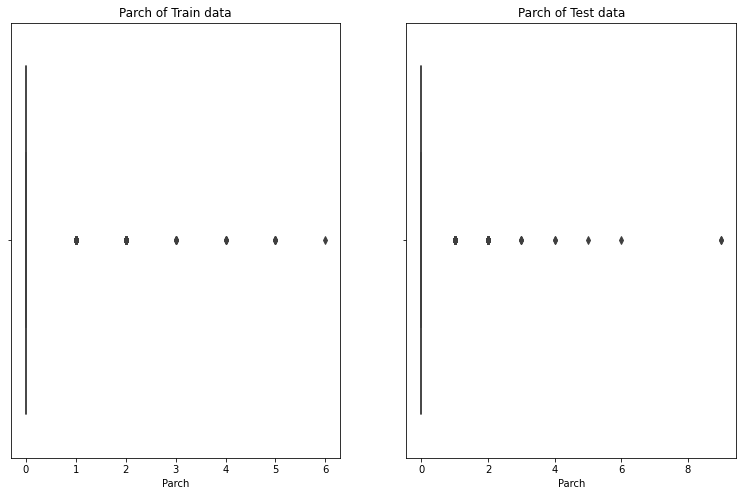

In [15]:
b_plott('Parch')

In [54]:
tr.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**As we can say intutively, high class people have paid more fare compared to other classes of people**

In [16]:
def c_plott(cols):
    for c in cols:
        plt.figure(figsize=(13,9))
        plt.title("Count plot of '{}' of Train data".format(c))
        sns.countplot(data=tr,x=c,hue='Survived',palette='Set2')
        plt.legend(["Died","Lived"],loc="upper right")
        plt.show()

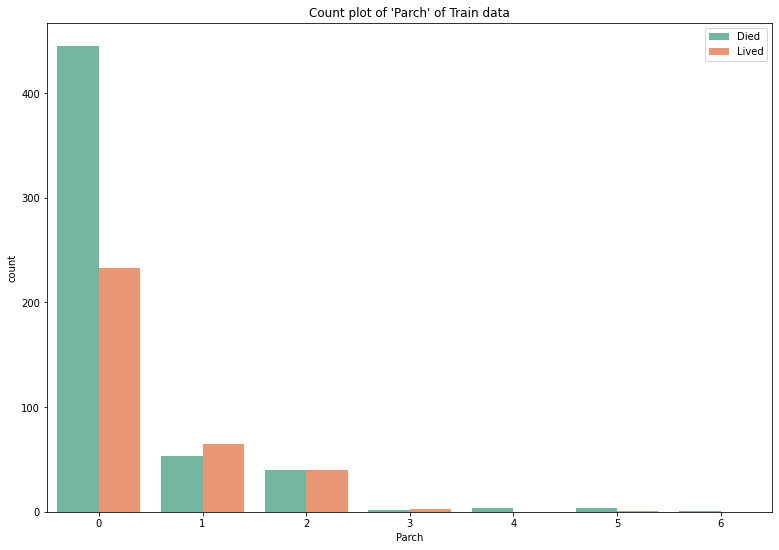

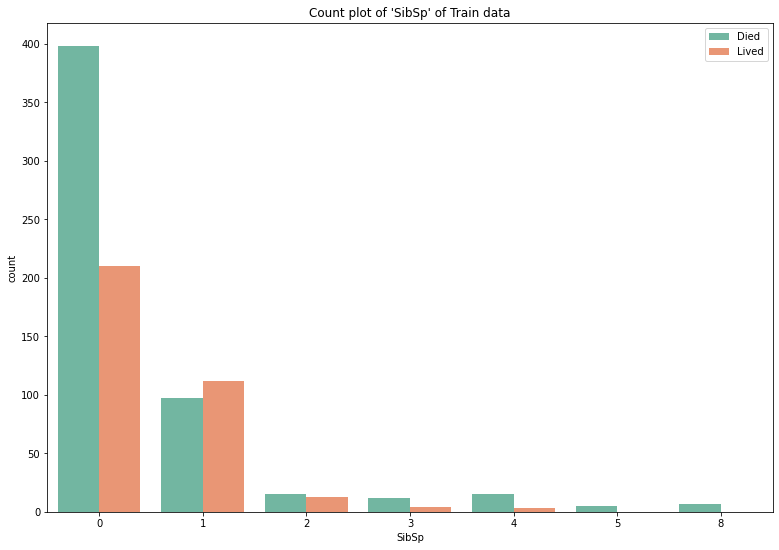

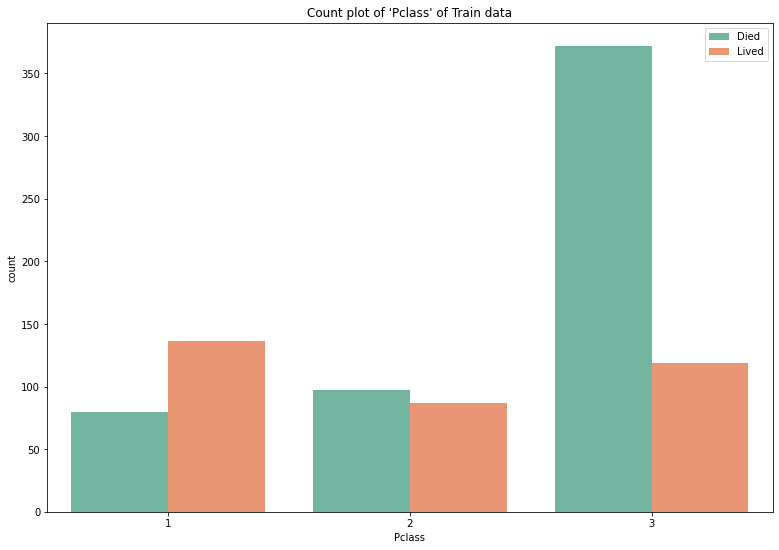

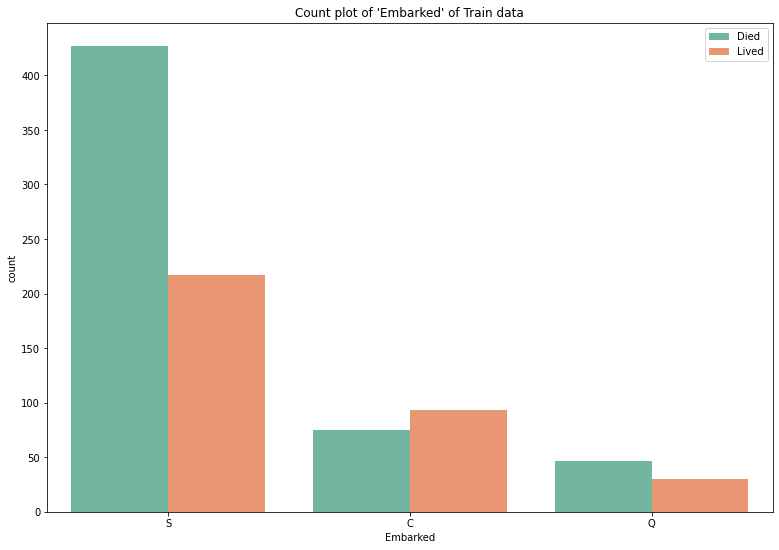

In [17]:
c_plott(['Parch','SibSp','Pclass','Embarked'])

### INTERPRETATIONS FROM EDA:
- Those who embarked from <u> `Southampton`</u> had a higher survival rate and also higher `death` rate when compared to those who embarked from `Cherbourg` & `Queenstown`.
- Those of <u>`3rd or lower socio-economic class` died more</u> when compared to middle and upper class people. Anyhow, there were also <u>more survivors in lower class next to the upper class people</u> who were the most who survived.
-  Those travelling without Family/parents or mostly individually have died in more number. However this category also have large number of people who have survived the disaster.
- `age` & `fare` seem to have outliers which will be handled further

# HANDLING MISSING VALUES AND CATEGORICAL COLUMNS
 

<UL TYPE="SQUARE"> <LI>Imputing &lt Fare &gt column with mean of &lt Fare &gt values</li>
<li>Imputing &lt Embarked &gt column with mode of &lt Embarked &gt</li>
<li>Label encoding the values of &lt Sex &gt column</li>
<li>Imputing &lt Age &gt column with mode (based on sex)</li>


In [18]:
tes.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
tr.Fare.mean()

32.204207968574636

In [20]:
tr['Fare']=tr['Fare'].fillna(tr.Fare.mean())

In [21]:
tes['Fare']=tes['Fare'].fillna(tes.Fare.mean())

In [22]:
print(tr.Fare.isna().sum())
print(tes.Fare.isna().sum())

0
0


In [23]:
sex={'male':0,'female':1}
tes['Sex']=tes['Sex'].map(sex)
tes

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [24]:
tr['Sex']=tr['Sex'].map(sex)

In [25]:
np.dtype(tr.Sex)

dtype('int64')

In [26]:
tr['Embarked']=tr['Embarked'].fillna(tr['Embarked'].mode()[0])

In [27]:
tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [28]:
tr.Embarked.isna().sum()

0

In [29]:
np.dtype(tr.Embarked)

dtype('O')

In [30]:
age=np.ceil(tr.groupby(['Sex'])['Age'].mean())
age

Sex
0    31.0
1    28.0
Name: Age, dtype: float64

In [103]:
age[0]

31.0

In [31]:
tr['Age']=tr[['Age','Sex']].apply(lambda x: age[int(x['Sex'])] if pd.isna(x['Age']) else x['Age'], axis=1)
tes['Age']=tes[['Age','Sex']].apply(lambda x: age[int(x['Sex'])] if pd.isna(x['Age']) else x['Age'], axis=1)

In [32]:
tes.Age.isna().sum()

0

In [33]:
tes.select_dtypes('object').columns

Index(['Name', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

###<B> DROPPING IRRELEVANT COLUMNS</B>

In [34]:
tr.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
tes.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [35]:
tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [36]:
tes.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


In [38]:
a=tr.Age.value_counts()
a[a>1]

31.0    141
28.0     78
24.0     30
22.0     27
18.0     26
       ... 
40.5      2
55.0      2
32.5      2
28.5      2
45.5      2
Name: Age, Length: 72, dtype: int64

In [39]:
bins = [0, 2, 10, 19, 29, 39]
names = ['Babies', 'Children', 'Teenagers', '20s', '30s']

tr['AgeRange'] = pd.cut(tr['Age'], bins, labels=names)
tr['AgeRange']

0            20s
1            30s
2            20s
3            30s
4            30s
         ...    
886          20s
887    Teenagers
888          20s
889          20s
890          30s
Name: AgeRange, Length: 891, dtype: category
Categories (5, object): ['Babies' < 'Children' < 'Teenagers' < '20s' < '30s']

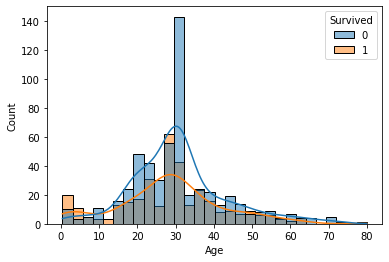

In [42]:
sns.histplot(data = tr, x="Age", hue="Survived" ,kde = True)

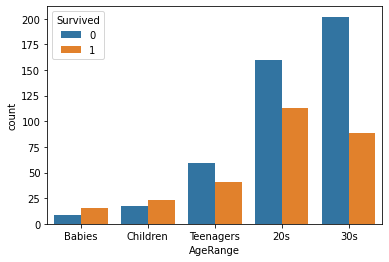

In [43]:
sns.countplot(data=tr,x="AgeRange",hue="Survived")

**INTERPRETATIONS:**<br>
- Both survival and death rates are substantial in age range of 20s & 30s and teenagers as next to them.
- Histogram shows the skewness and peakedness in AgeRange of the given train set

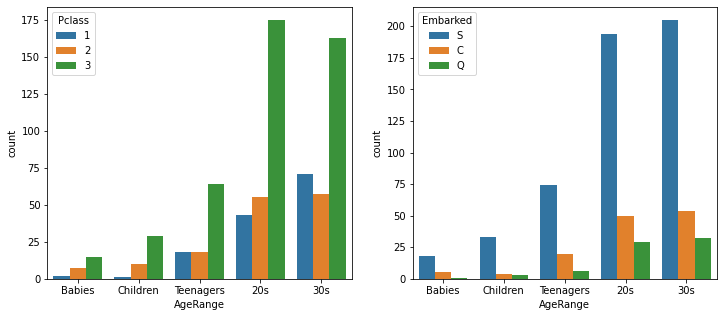

In [51]:
fig=plt.figure(figsize=(12,5))
fig.add_subplot(1,2,1)
sns.countplot(data=tr,x="AgeRange",hue="Pclass")
fig.add_subplot(1,2,2)
sns.countplot(data=tr,x="AgeRange",hue="Embarked")

**INTERPRETATIONS:**
<BR>
- Thus from the above graphs made using the new column `AgeRange`, it can be seen that most of the data are contributed by people in 20's and 30's
- Many people of third pclass had boarded on that day of disaster and many of those embarked from Southamptop.
<br><u>NOW, THAT WE HAVE DONE ENOUGH EDA WITH NEWLY FORMED COLUMN `AGERANGE`, WE'LL NOW DROP IT AND MOVE ON</u> 

In [52]:
tr.drop(['AgeRange'],axis=1,inplace=True)
tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [53]:
#dropping property_id too
tr.drop(['PassengerId'],axis=1,inplace=True)
tr.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [55]:
tr.select_dtypes('object').columns

Index(['Embarked'], dtype='object')

## ONE HOT ENCODING

In [60]:
xemb=pd.get_dummies(tr['Embarked'])
xembt=pd.get_dummies(tes['Embarked'])

In [62]:
tr=pd.concat((tr,xemb),axis=1)
tes=pd.concat((tes,xembt),axis=1)

In [64]:
pcla=pd.get_dummies(tr['Pclass'])
pclat=pd.get_dummies(tes['Pclass'])

In [65]:
tr=pd.concat((tr,pcla),axis=1)
tes=pd.concat((tes,pclat),axis=1)

In [66]:
tr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,1,2,3
0,0,3,0,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1,1,0,0
4,0,3,0,35.0,0,0,8.0500,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,0,0,1,0,1,0
887,1,1,1,19.0,0,0,30.0000,S,0,0,1,1,0,0
888,0,3,1,28.0,1,2,23.4500,S,0,0,1,0,0,1
889,1,1,0,26.0,0,0,30.0000,C,1,0,0,1,0,0


In [67]:
tes

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,1,2,3
0,892,3,0,34.5,0,0,7.8292,Q,0,1,0,0,0,1
1,893,3,1,47.0,1,0,7.0000,S,0,0,1,0,0,1
2,894,2,0,62.0,0,0,9.6875,Q,0,1,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,S,0,0,1,0,0,1
4,896,3,1,22.0,1,1,12.2875,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,31.0,0,0,8.0500,S,0,0,1,0,0,1
414,1306,1,1,39.0,0,0,108.9000,C,1,0,0,1,0,0
415,1307,3,0,38.5,0,0,7.2500,S,0,0,1,0,0,1
416,1308,3,0,31.0,0,0,8.0500,S,0,0,1,0,0,1


In [69]:
tr.drop(['Pclass','Embarked'],axis=1,inplace=True)
tes.drop(['Pclass','Embarked'],axis=1,inplace=True)
tr

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,0
888,0,1,28.0,1,2,23.4500,0,0,1,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0,1,0,0


## SEPERATING DEPENDENT VARIABLE FROM THE INDEPENDENT VARIABLES

In [95]:
ytr=tr['Survived']
xtr=tr.drop(['Survived'],axis=1)
xtr

,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,0,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,0
888,1,28.0,1,2,23.4500,0,0,1,0,0,1
889,0,26.0,0,0,30.0000,1,0,0,1,0,0


In [75]:
tes.drop(['PassengerId'],axis=1,inplace=True)
tes

,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,0,34.5,0,0,7.8292,0,1,0,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,31.0,0,0,8.0500,0,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,0,1,0,0
415,0,38.5,0,0,7.2500,0,0,1,0,0,1
416,0,31.0,0,0,8.0500,0,0,1,0,0,1


## STANDARDIZATION

In [70]:
sc=StandardScaler()

In [96]:
xtr[xtr.columns]=sc.fit_transform(xtr[xtr.columns])
xtr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,-0.737695,-0.597926,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
1,1.355574,0.631885,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.623803,1.767767,-0.510152,-1.107926
2,1.355574,-0.290473,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
3,1.355574,0.401296,0.432793,-0.473674,0.420730,-0.482043,-0.307562,0.615838,1.767767,-0.510152,-1.107926
4,-0.737695,0.401296,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.737695,-0.213610,-0.474545,-0.473674,-0.386671,-0.482043,-0.307562,0.615838,-0.565685,1.960202,-1.107926
887,1.355574,-0.828515,-0.474545,-0.473674,-0.044381,-0.482043,-0.307562,0.615838,1.767767,-0.510152,-1.107926
888,1.355574,-0.136747,0.432793,2.008933,-0.176263,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
889,-0.737695,-0.290473,-0.474545,-0.473674,-0.044381,2.074505,-0.307562,-1.623803,1.767767,-0.510152,-1.107926


In [97]:
tes[tes.columns]=sc.fit_transform(tes[tes.columns])
tes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,-0.755929,0.336944,-0.499470,-0.400248,-0.498407,-0.568142,2.843757,-1.350676,-0.586559,-0.534933,0.957826
1,1.322876,1.326286,0.616992,-0.400248,-0.513274,-0.568142,-0.351647,0.740370,-0.586559,-0.534933,0.957826
2,-0.755929,2.513496,-0.499470,-0.400248,-0.465088,-0.568142,2.843757,-1.350676,-0.586559,1.869391,-1.044031
3,-0.755929,-0.256661,-0.499470,-0.400248,-0.483466,-0.568142,-0.351647,0.740370,-0.586559,-0.534933,0.957826
4,1.322876,-0.652397,0.616992,0.619896,-0.418471,-0.568142,-0.351647,0.740370,-0.586559,-0.534933,0.957826
...,...,...,...,...,...,...,...,...,...,...,...
413,-0.755929,0.059929,-0.499470,-0.400248,-0.494448,-0.568142,-0.351647,0.740370,-0.586559,-0.534933,0.957826
414,1.322876,0.693107,-0.499470,-0.400248,1.313753,1.760125,-0.351647,-1.350676,1.704858,-0.534933,-1.044031
415,-0.755929,0.653533,-0.499470,-0.400248,-0.508792,-0.568142,-0.351647,0.740370,-0.586559,-0.534933,0.957826
416,-0.755929,0.059929,-0.499470,-0.400248,-0.494448,-0.568142,-0.351647,0.740370,-0.586559,-0.534933,0.957826


## CHECK FOR MULTICOLLINEARITY

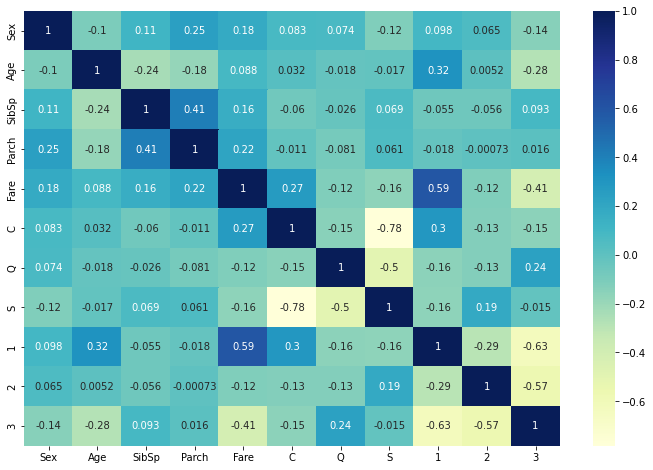

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(xtr.corr(),annot=True,cmap='YlGnBu')

In [106]:
len(abs(xtr.corr().values)>0.8)

11

THOSE 11 ARE THE DIAGONALS IN CORRELATION MATRIX (11=NO OF FEATURES) SO THERE ARE NO SIGNIFICANT MULTICOLLINEARITY FOUND

## HANDLING IMBALANCES

In [107]:
ytr.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [109]:
smote = SMOTE(sampling_strategy='auto')
smote=SMOTE()
x_sm, y_sm = smote.fit_resample(xtr, ytr)

y_sm.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0    549
1    549
Name: Survived, dtype: int64

## TRAIN_TEST_SPLIT

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=4)
x_train

,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
193,-0.737695,-2.058326,0.432793,0.767630,-0.124920,-0.482043,-0.307562,0.615838,-0.565685,1.960202,-1.107926
758,-0.737695,0.324432,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
511,-0.737695,0.093843,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
851,-0.737695,3.398959,-0.474545,-0.473674,-0.491874,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
676,-0.737695,-0.405768,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...,...,...
456,-0.737695,2.707191,-0.474545,-0.473674,-0.113846,-0.482043,-0.307562,0.615838,1.767767,-0.510152,-1.107926
360,-0.737695,0.785612,0.432793,4.491540,-0.086664,-0.482043,-0.307562,0.615838,-0.565685,-0.510152,0.902587
709,-0.737695,0.093843,0.432793,0.767630,-0.341452,2.074505,-0.307562,-1.623803,-0.565685,-0.510152,0.902587
439,-0.737695,0.093843,-0.474545,-0.473674,-0.437007,-0.482043,-0.307562,0.615838,-0.565685,1.960202,-1.107926


# BUILDING DEFAULT RANDOM_FOREST_CLASSIFIER MODEL

In [111]:
randomdf=RandomForestClassifier()
randomdf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [113]:
x_pred=randomdf.predict(x_test)
x_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [115]:
x_pred.shape

(330,)

In [124]:
randomdf.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8393939393939394

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(x_pred,y_test.to_numpy())

0.8393939393939394

In [126]:
randomdf.n_estimators

100

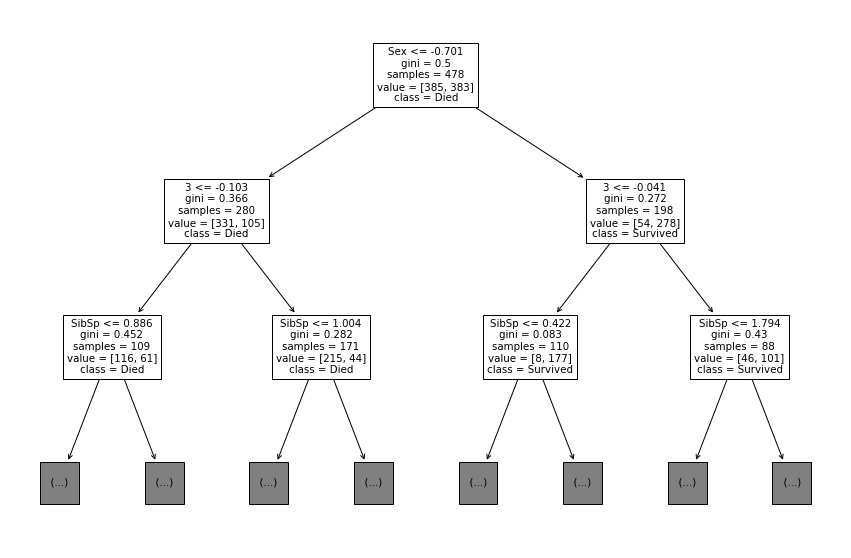

In [127]:
fig = plt.figure(figsize=(15, 10))
plot_tree(randomdf.estimators_[0],max_depth=2,feature_names=x_train.columns,class_names=['Died','Survived']);

In [128]:
randomdf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### INTERPRETATION:
WE SEE THE MODEL SCORE CAN BE FURTHER IMPROVED.
<BR> SO, WE USE GRID_SEARCH_CV TO IMPROVE THE SCORE

# HYPERPARAMETER TUNING

In [132]:
grid_param = {
    "n_estimators" : range(10,150,50),
    'max_depth' : range(2,10,2),
    'min_samples_split' : range(2,10,2),
    'criterion': ['gini','log_loss','entropy'],
    'max_leaf_nodes': range(1,200,50)
}

In [133]:
grid_search = GridSearchCV(estimator = randomdf, param_grid = grid_param, cv = 5,)
grid_search.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'max_leaf_nodes': range(1, 200, 50),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 150, 50)})

### BEST PARAMETERS:

In [134]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_leaf_nodes': 101,
 'min_samples_split': 6,
 'n_estimators': 60}

## TUNED RANDOM_FOREST_CLASSIFIER

In [162]:
rf_tuned=RandomForestClassifier(criterion='entropy',max_depth= 8,
                               max_leaf_nodes= 101,min_samples_split= 6,
                               n_estimators= 60)
rf_tuned.fit(x_train,y_train)
rf_tuned.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8545454545454545

## Interpretation:
We see the score has been improved using the tuned rf **83% to 85%**

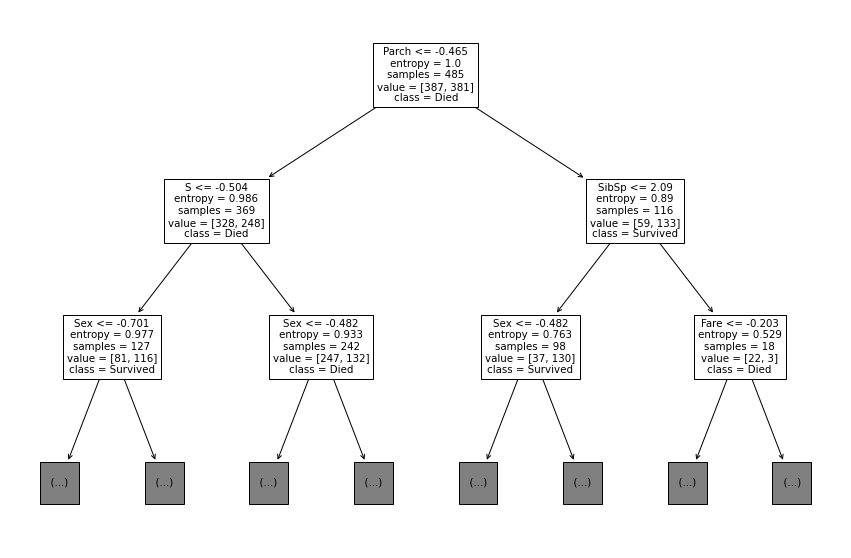

In [187]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rf_tuned.estimators_[0],max_depth=2,feature_names=x_train.columns,class_names=['Died','Survived']);

# BUILDING  a decision_tree_classifier MODEL

In [163]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(random_state=0)

In [164]:
yd_pred=dt.predict(x_test)
yd_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [167]:
dt.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8303030303030303

In [165]:
accuracy_score(y_test,yd_pred)

0.8303030303030303

In [166]:
dt.get_depth()

22

In [169]:
dt.get_n_leaves()

176

In [185]:
grid_param2 = {
    'splitter':['best','random'],
    'max_depth' : range(20,40,2),
    'min_samples_split' : range(2,20,2),
    'criterion': ['gini','log_loss','entropy'],
    'max_leaf_nodes': range(50,200,24)
}

In [186]:
grid_search2 = GridSearchCV(estimator = dt, param_grid = grid_param2, cv = 5,)
grid_search2.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': range(20, 40, 2),
                         'max_leaf_nodes': range(50, 200, 24),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

### let's improve the score by HyperParameter Tuning:

In [197]:
tuned_dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 22,
                                max_leaf_nodes= 189,min_samples_split= 10,
                                splitter= 'random')
tuned_dt.fit(x_train,y_train)
tuned_dt.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8606060606060606

## INTERPRETATIONS:
Thus it can be seen that the score has been improved considering the suggestions of grid_search_cv and thereafter finetuning it. 

DT BEFORE & AFTER HYPERPARAMETER_TUNING


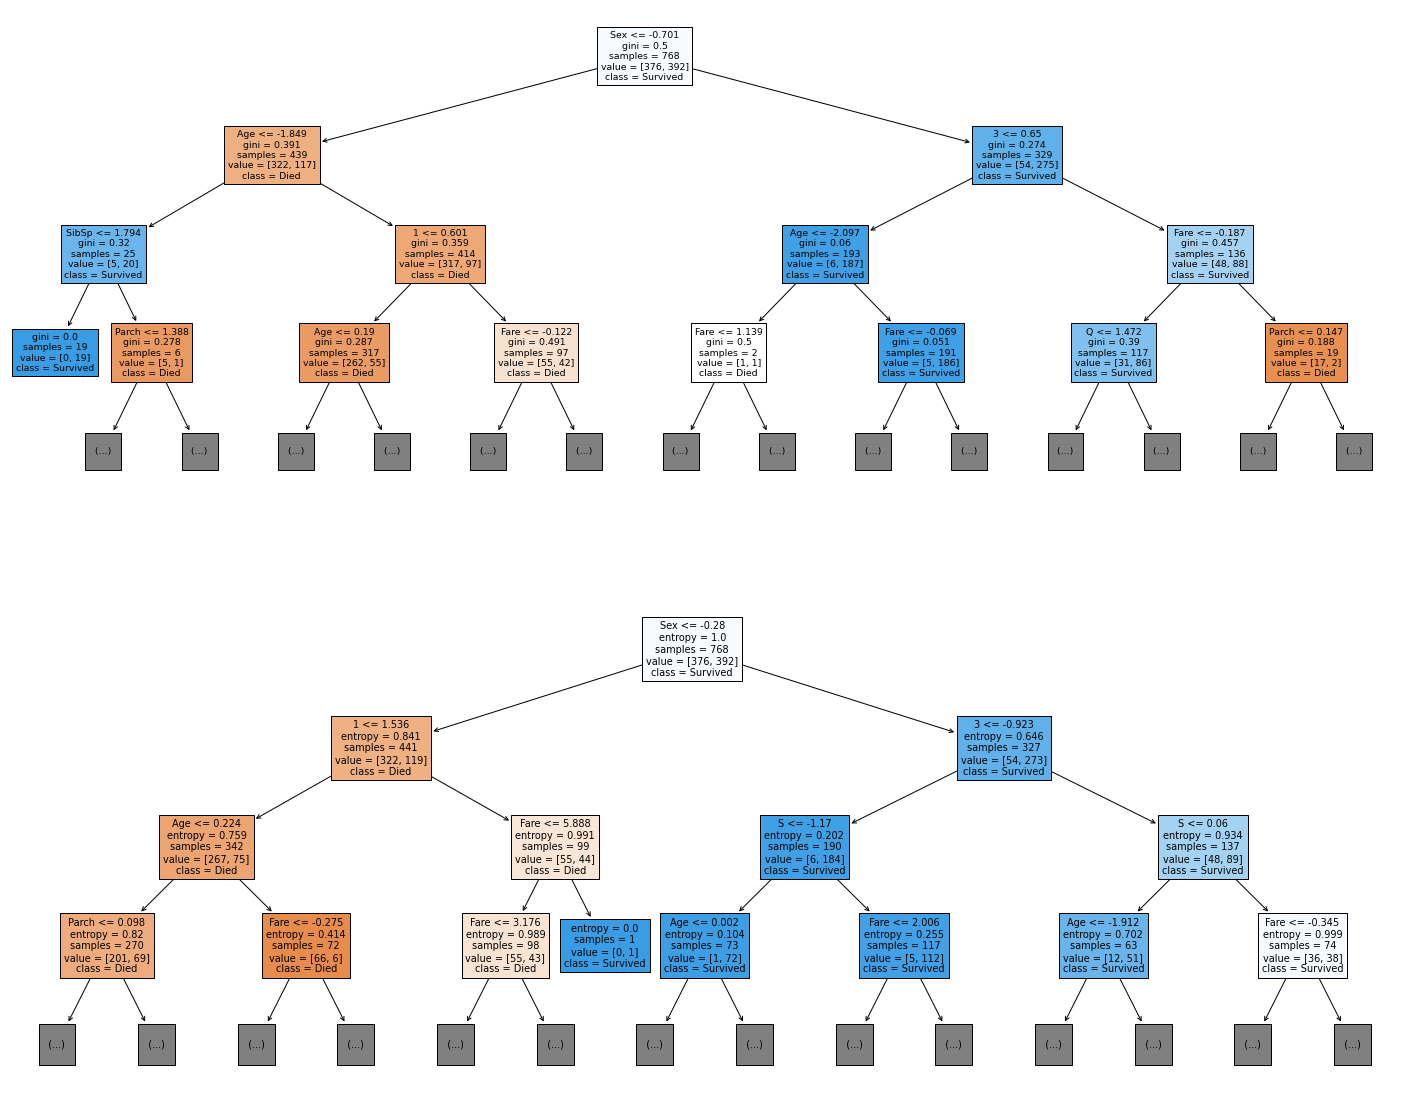

In [203]:
print("DT BEFORE & AFTER HYPERPARAMETER_TUNING")
fig = plt.figure(figsize=(25,20))
fig.add_subplot(2,1,1)
_ = tree.plot_tree(dt,max_depth=3, 
                   feature_names=x_test.columns,  
                   class_names=['Died','Survived'],
                   filled=True)
fig.add_subplot(2,1,2)

_ = tree.plot_tree(tuned_dt,max_depth=3, 
                   feature_names=x_test.columns,  
                   class_names=['Died','Survived'],
                   filled=True)

# LET'S PREDICT FOR THE TEST DATA:

In [206]:
pred1=rf_tuned.predict(tes)
pred1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [207]:
pred2=tuned_dt.predict(tes)
pred2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [208]:
accuracy_score(pred1,pred2)

0.5358851674641149

The result obtained from both the classifiers are varying 50% 

This shows that there are lot of rooms for improvement, which can be taken to next step of research 

In [209]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [210]:
lr.fit(x_train,y_train)
lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [211]:
lr.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8212121212121212

## INTERPRETATIONS:
FROM THIS, WE CAN CONCLUDE THAT THE RANDOM_FOREST AND DECISION_TREE CLASSIFIER MODELS PERFORM BETTER THAN LOGISTIC_REGRESSION MODEL